# Project Anc2Vec embeddings

## Install anc2vec package and other dependencies

In [1]:
!pip3 install -U pip > /dev/null
!pip3 install -U umap-learn > /dev/null
!pip3 install -U "anc2vec @ git+https://github.com/aedera/anc2vec.git" > /dev/null

  Running command git clone -q https://github.com/aedera/anc2vec.git /tmp/pip-install-lta0jnmt/anc2vec_1c02aa0d65f34d24b156ae331c6518f7


## Load embeddings

This command loads 200-dimensional embeddings constructed using the obo file release 2020-10-06.

In [2]:
import anc2vec
import numpy as np

embeds = anc2vec.get_embeddings()
allembeds = np.asarray(list(embeds.values()))

## Make projections
Project the 200-dimensional embeddings onto a 2-dimensional space.

In [3]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
proj = reducer.fit_transform(allembeds)

## Visualize 2-D projections of embeddings

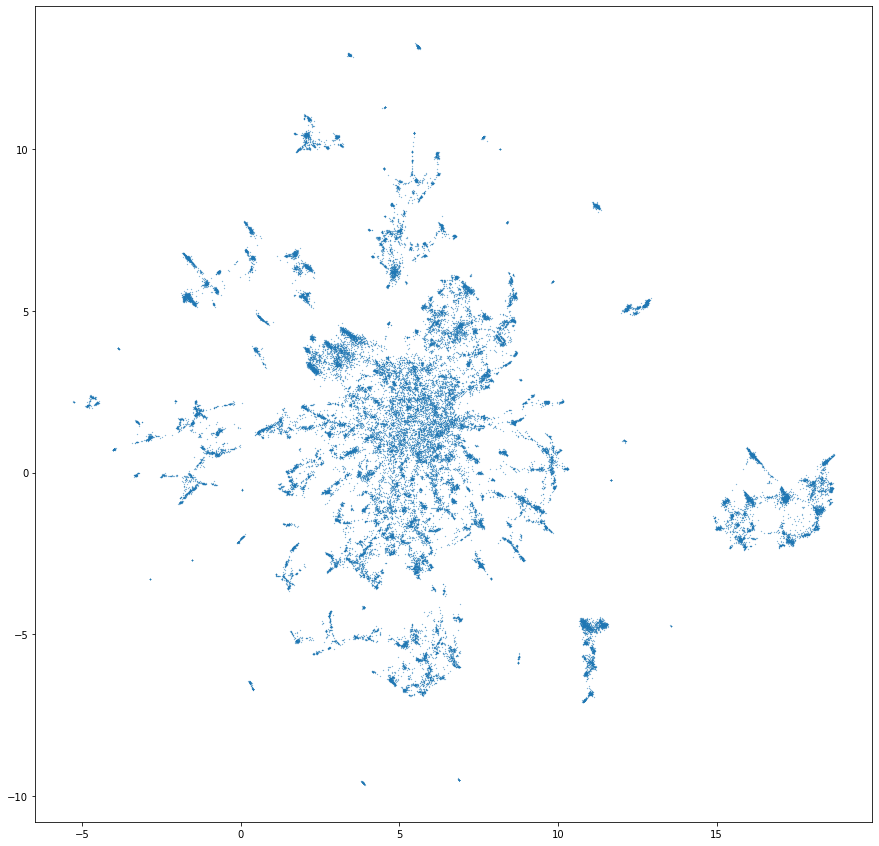

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(proj[:,0], proj[:,1], s=.05)